# EasyOCR detect 테스트

## detect 함수로 실행

파일명 : 5350109-2001-0001-0001.jpg
인식 실행 중

<EasyOCR 문자 영역 인식 결과>
([[[952, 1742, 316, 385], [954, 1035, 385, 466], [1319, 1408, 381, 465], [366, 676, 480, 540], [713, 1426, 477, 543], [1463, 2314, 477, 543], [361, 621, 550, 618], [682, 1066, 548, 621], [1130, 1537, 550, 618], [1571, 1778, 552, 618], [1846, 2003, 552, 618], [2037, 2250, 552, 618], [347, 818, 630, 696], [1370, 1541, 634, 686], [1593, 2325, 629, 697], [353, 560, 700, 768], [600, 859, 700, 765], [953, 1108, 698, 784], [1481, 1652, 720, 772], [2187, 2231, 727, 771], [353, 560, 774, 840], [597, 743, 777, 837], [867, 1120, 770, 859], [1477, 1651, 794, 854], [347, 549, 858, 921], [1480, 1653, 880, 940], [1956, 2166, 804, 950], [353, 537, 947, 1015], [572, 1348, 947, 1015], [1477, 1659, 972, 1037], [577, 976, 1038, 1106], [1971, 2147, 1030, 1090], [1477, 1717, 1060, 1129], [1753, 1888, 1067, 1122], [2114, 2251, 1084, 1163], [352, 544, 1134, 1210], [1476, 1660, 1154, 1223], [1677, 1990, 1136, 1265], [2350, 2520, 1193, 1266], [1500

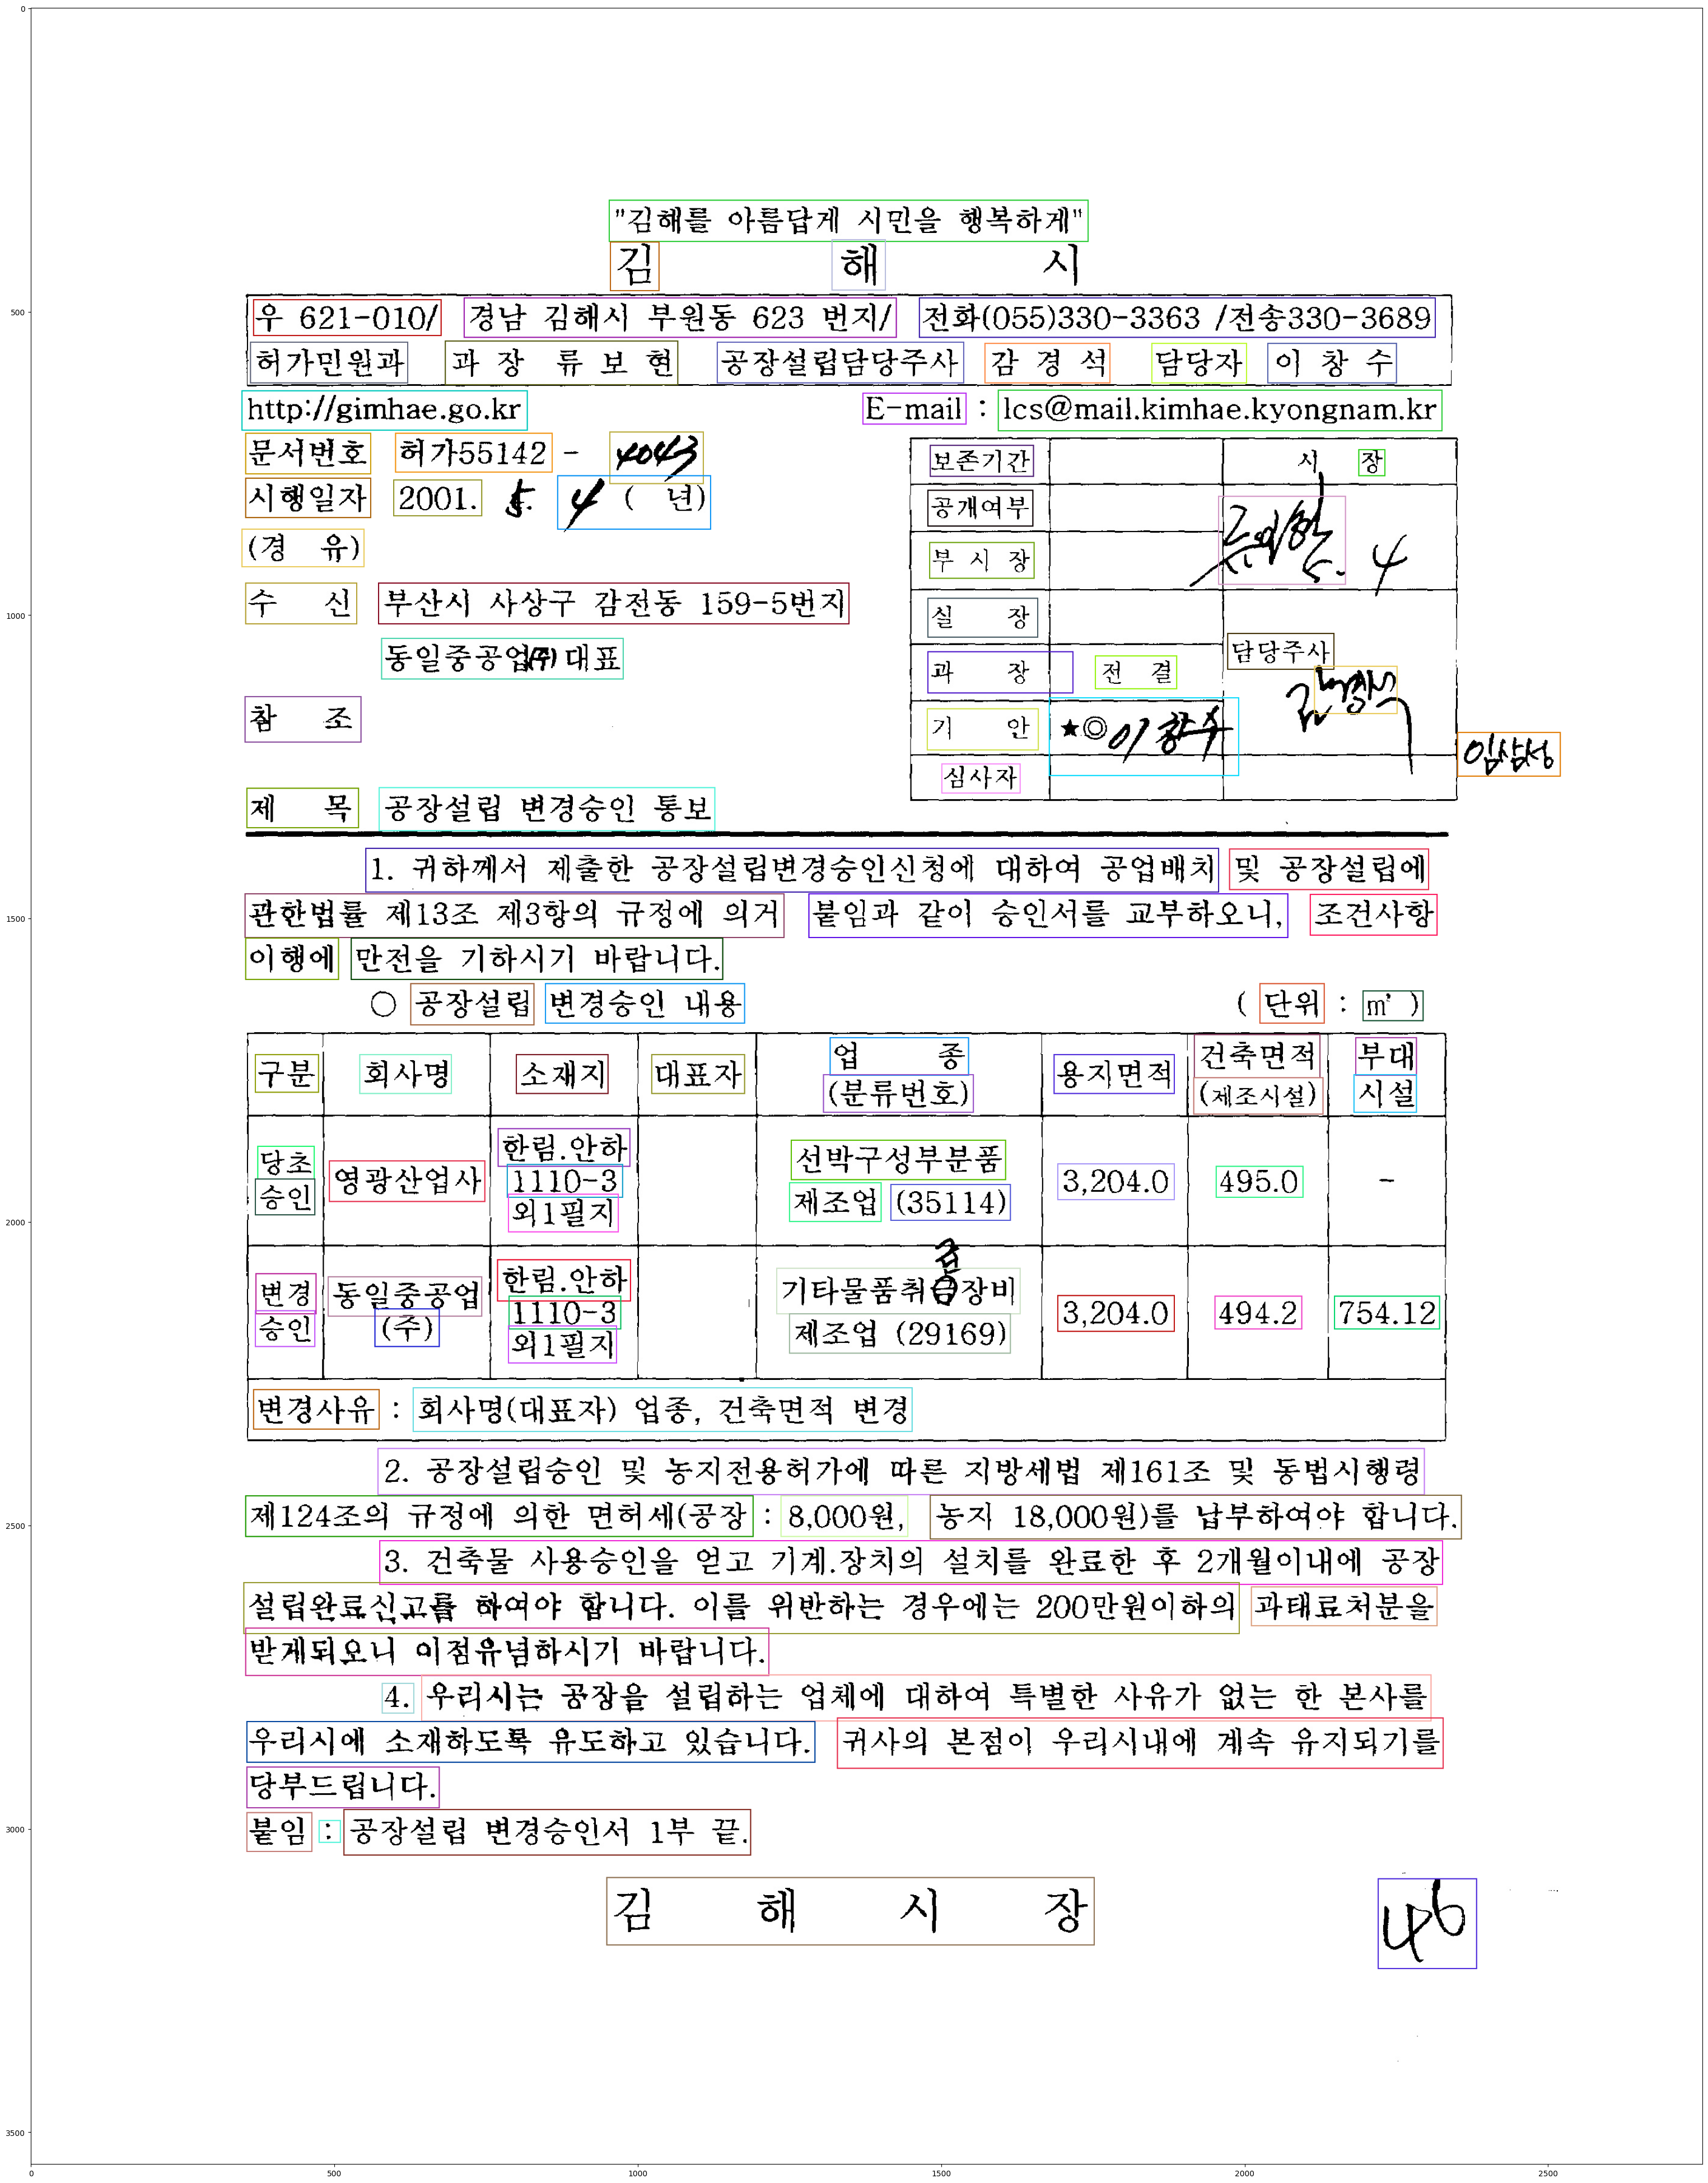


<테스트 총 결과>
총 데이터 수 : 1개
총 소요 시간 : 0분 1초
평균 인식 시간 : 1.85초


In [67]:
import easyocr
import json
import os
import time

import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

# 폴더 경로
folder_path_source = '2001_source'
folder_path_label = '2001_label'

# 폴더 안에 있는 모든 파일을 리스트 형태로 가져오기
file_list = os.listdir(folder_path_source)

# 파일 경로와 파일 이름 결합
file_paths = [os.path.join(folder_path_source, file_name) for file_name in file_list]

# 파일 수와 평균 경과 시간, 평균 정확도를 저장할 변수 초기화
file_count = len(file_paths)
total_elapsed_time = 0
total_accuracy = 0


# 파일 개수 지정 (ex) 1개)
file_paths = file_paths[:1]
file_count = 1


# easyocr 모델 로드
reader = easyocr.Reader(['ko','en'], gpu=True)

# 각 파일에 대해 OCR 수행
for file_path in file_paths:
    filename_split = os.path.splitext(os.path.basename(file_path))[0]
    print("파일명 :", os.path.basename(file_path))
    print("인식 실행 중")
    
    # 시작 시간 저장
    start_time = time.time()
    
    # OCR 인식 결과 추출
    result = reader.detect(folder_path_source+"/"+filename_split+".jpg")
    
    # 인식 경과 시간 계산
    elapsed_time = time.time() - start_time
    
    # 총 경과 시간 계산
    total_elapsed_time += elapsed_time
    
    # 문자 인식 결과 출력
    print("")
    print("<EasyOCR 문자 영역 인식 결과>")
    print(result)
    
    # 라벨링 데이터(json) 파일 불러오기
    with open(folder_path_label+"/"+filename_split+".json", encoding="UTF8") as file:
        data = json.load(file)
        json_test = data['annotations']
        
        # 라벨링 데이터의 좌표 값만 출력
        print("")
        print("<라벨링 데이터>")
        for k in json_test:
            print(k['annotation.bbox'])
            
    # 경과 시간 출력
    print("")
    print("경과 시간 : {:.2f}초".format(elapsed_time))
    print("")
            
    # 인식 결과 출력
    img = cv2.imread(folder_path_source+"/"+filename_split+".jpg")

    img = Image.fromarray(img)    # 이미지에 그리기 위해서 CV2 이미지를 PIL 이미지 객체로 변환
    draw = ImageDraw.Draw(img)

    np.random.seed(42)
    COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")

    # result의 좌표 값 슬라이싱
    for sublist in result[0]:
        coordinate = sublist[:]

    for i in coordinate :
        # 이미지 좌표 변수 지정
        x = i[0]
        y = i[2] 
        w = i[1] - i[0]
        h = i[3] - i[2]
    
        # 랜덤 색상 지정
        color_idx = random.randint(0,254)
        color = [int(c) for c in COLORS[color_idx]]

        # 이미지에 인식 영역 / 인식 문자 출력
        draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)

    plt.figure(figsize=(50,50))
    plt.imshow(img)
    plt.show()
    img.save('ResultImage_detect/'+filename_split+'_result(detect).jpg')  # JPG 형식으로 저장
    print("")

# 총 데이터 수 및 총 소요시간, 평균 경과 시간, 평균 정확도 계산
average_elapsed_time = total_elapsed_time / file_count
average_accuracy = total_accuracy / file_count
total_minutes = int(total_elapsed_time // 60)
total_seconds = int(total_elapsed_time % 60)

# 테스트 결과 출력
print("<테스트 총 결과>")
print("총 데이터 수 : "+str(file_count)+"개")
print("총 소요 시간 : "+str(total_minutes)+"분 "+str(total_seconds)+"초")
print("평균 인식 시간 : {:.2f}초".format(average_elapsed_time))

## readtext 함수로 실행

파일명 : 5350109-2001-0001-0001.jpg
인식 실행 중

<EasyOCR 인식 결과>
[([[952, 319], [1126, 319], [1126, 382], [952, 382]], '"김해틀', 0.6891791224479675), ([[1138, 316], [1340, 316], [1340, 385], [1138, 385]], '아름답게', 0.9564188718795776), ([[1352, 316], [1506, 316], [1506, 382], [1352, 382]], '시민흘', 0.21049218836622702), ([[1518, 316], [1742, 316], [1742, 385], [1518, 385]], '행복하게"', 0.9996494662489984), ([[954, 385], [1035, 385], [1035, 466], [954, 466]], '김', 0.9998815094763955), ([[1319, 381], [1408, 381], [1408, 465], [1319, 465]], '해', 0.9999432571831335), ([[367, 481], [420, 481], [420, 539], [367, 539]], '우', 0.9999682905803553), ([[433, 480], [676, 480], [676, 540], [433, 540]], '621-010/', 0.8502205921099988), ([[713, 477], [832, 477], [832, 543], [713, 543]], '경남', 0.9630026380685481), ([[833, 477], [993, 477], [993, 543], [833, 543]], '김해시', 0.9941473818466108), ([[1010, 477], [1168, 477], [1168, 543], [1010, 543]], '부원동', 0.9962835228060669), ([[1180, 480], [1284, 480], [1284, 540], [118

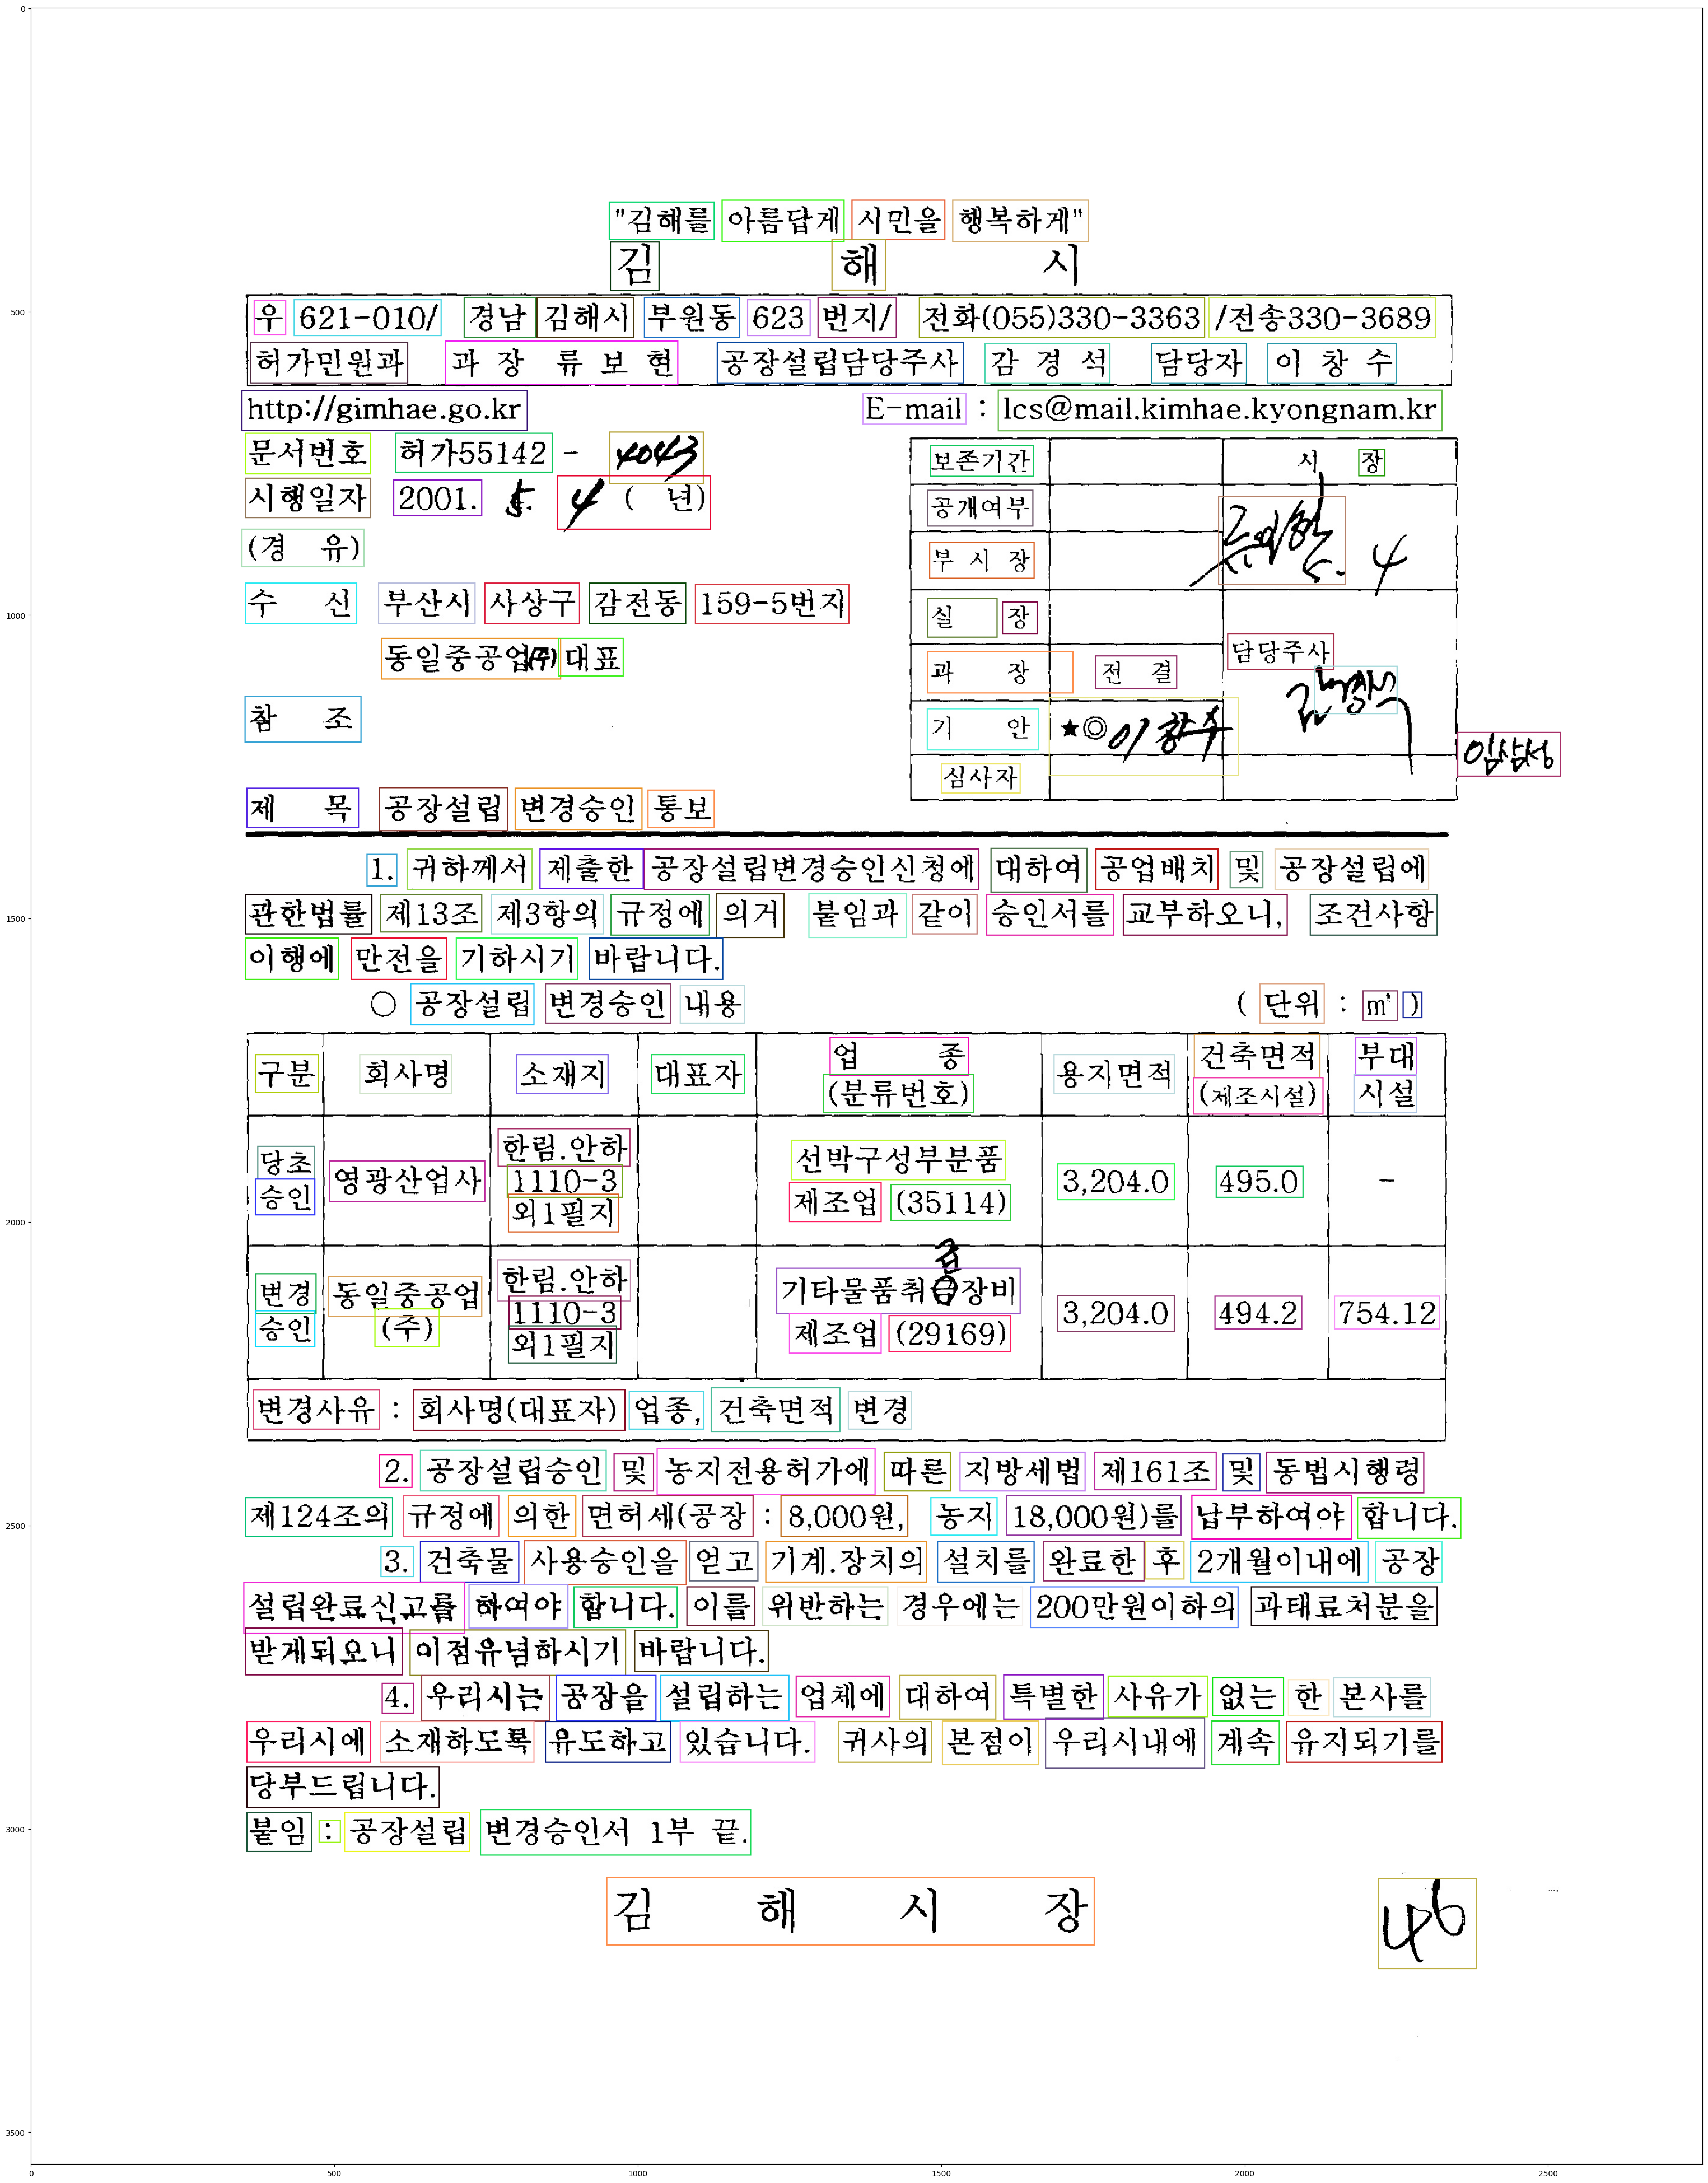


<테스트 총 결과>
총 데이터 수 : 1개
총 소요 시간 : 0분 2초
평균 인식 시간 : 2.83초


In [73]:
import easyocr
import json
import os
import time

import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

# 폴더 경로
folder_path_source = '2001_source'
folder_path_label = '2001_label'

# 폴더 안에 있는 모든 파일을 리스트 형태로 가져오기
file_list = os.listdir(folder_path_source)

# 파일 경로와 파일 이름 결합
file_paths = [os.path.join(folder_path_source, file_name) for file_name in file_list]

# 파일 수와 평균 경과 시간, 평균 정확도를 저장할 변수 초기화
file_count = len(file_paths)
total_elapsed_time = 0
total_accuracy = 0


# 파일 개수 지정 (ex) 1개)
file_paths = file_paths[:1]
file_count = 1


# easyocr 모델 로드
reader = easyocr.Reader(['ko','en'], gpu=True)

# 각 파일에 대해 OCR 수행
for file_path in file_paths:
    filename_split = os.path.splitext(os.path.basename(file_path))[0]
    print("파일명 :", os.path.basename(file_path))
    print("인식 실행 중")
    
    # 시작 시간 저장
    start_time = time.time()
    
    # OCR 인식 결과 추출
    result = reader.readtext(folder_path_source+"/"+filename_split+".jpg", width_ths=0.1, adjust_contrast=0.1)
    
    # 인식 경과 시간 계산
    elapsed_time = time.time() - start_time
    
    # 총 경과 시간 계산
    total_elapsed_time += elapsed_time
    
    # 문자 인식 결과 출력
    print("")
    print("<EasyOCR 인식 결과>")
    print(result)
    
    print("")
    print("<EasyOCR 좌표 값 인덱싱>")
    # 좌표 값만 출력 (인덱싱)
    for i in result:
        print(i[0])
    
    # 라벨링 데이터(json) 파일 불러오기
    with open(folder_path_label+"/"+filename_split+".json", encoding="UTF8") as file:
        data = json.load(file)
        json_test = data['annotations']
        
        # 라벨링 데이터의 좌표 값만 출력
        print("")
        print("<라벨링 데이터>")
        for k in json_test:
            print(k['annotation.bbox'])
            
    # 경과 시간 출력
    print("")
    print("경과 시간 : {:.2f}초".format(elapsed_time))
    print("")
            
    # 인식 결과 출력
    img = cv2.imread(folder_path_source+"/"+filename_split+".jpg")

    img = Image.fromarray(img)    # 이미지에 그리기 위해서 CV2 이미지를 PIL 이미지 객체로 변환
    draw = ImageDraw.Draw(img)

    np.random.seed(42)
    COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")

    for i in result :
        # 이미지 좌표 변수 지정
        x = i[0][0][0] 
        y = i[0][0][1] 
        w = i[0][1][0] - i[0][0][0] 
        h = i[0][2][1] - i[0][1][1]
    
        # 랜덤 색상 지정
        color_idx = random.randint(0,254)
        color = [int(c) for c in COLORS[color_idx]]

        # 이미지에 인식 영역 / 인식 문자 출력
        draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)

    plt.figure(figsize=(50,50))
    plt.imshow(img)
    plt.show()
    img.save('ResultImage_readtext/'+filename_split+'_result(readtext).jpg')  # JPG 형식으로 저장
    print("")

# 총 데이터 수 및 총 소요시간, 평균 경과 시간, 평균 정확도 계산
average_elapsed_time = total_elapsed_time / file_count
average_accuracy = total_accuracy / file_count
total_minutes = int(total_elapsed_time // 60)
total_seconds = int(total_elapsed_time % 60)

# 테스트 결과 출력
print("<테스트 총 결과>")
print("총 데이터 수 : "+str(file_count)+"개")
print("총 소요 시간 : "+str(total_minutes)+"분 "+str(total_seconds)+"초")
print("평균 인식 시간 : {:.2f}초".format(average_elapsed_time))

readtext 파라미터 값 제거 후 실행

(width_ths=0.1, adjust_contrast=0.1 삭제)

파일명 : 5350109-2001-0001-0001.jpg
인식 실행 중

<EasyOCR 인식 결과>
[([[952, 316], [1742, 316], [1742, 385], [952, 385]], '"김해률 아름답게  시민올   행복하게"', 0.45650430441300477), ([[954, 385], [1035, 385], [1035, 466], [954, 466]], '김', 0.9998815094763955), ([[1319, 381], [1408, 381], [1408, 465], [1319, 465]], '해', 0.9999432571831335), ([[366, 480], [676, 480], [676, 540], [366, 540]], '우 621-010/', 0.7518699119381419), ([[713, 477], [1426, 477], [1426, 543], [713, 543]], '경남   김해시  부원동 623 번지/', 0.429695606614425), ([[1463, 477], [2314, 477], [2314, 543], [1463, 543]], '전화(055)330-3363 /전송330-3689', 0.6727501107562616), ([[361, 550], [621, 550], [621, 618], [361, 618]], '허가민원과', 0.9904357952537031), ([[682, 548], [1066, 548], [1066, 621], [682, 621]], '과 장 류 보 현', 0.7432140250709963), ([[1130, 550], [1537, 550], [1537, 618], [1130, 618]], '공장설립담당주사', 0.9860986545189757), ([[1571, 552], [1778, 552], [1778, 618], [1571, 618]], '감 경 석', 0.7343933914006496), ([[1846, 552], [2003, 552], [2003, 618], [1846, 

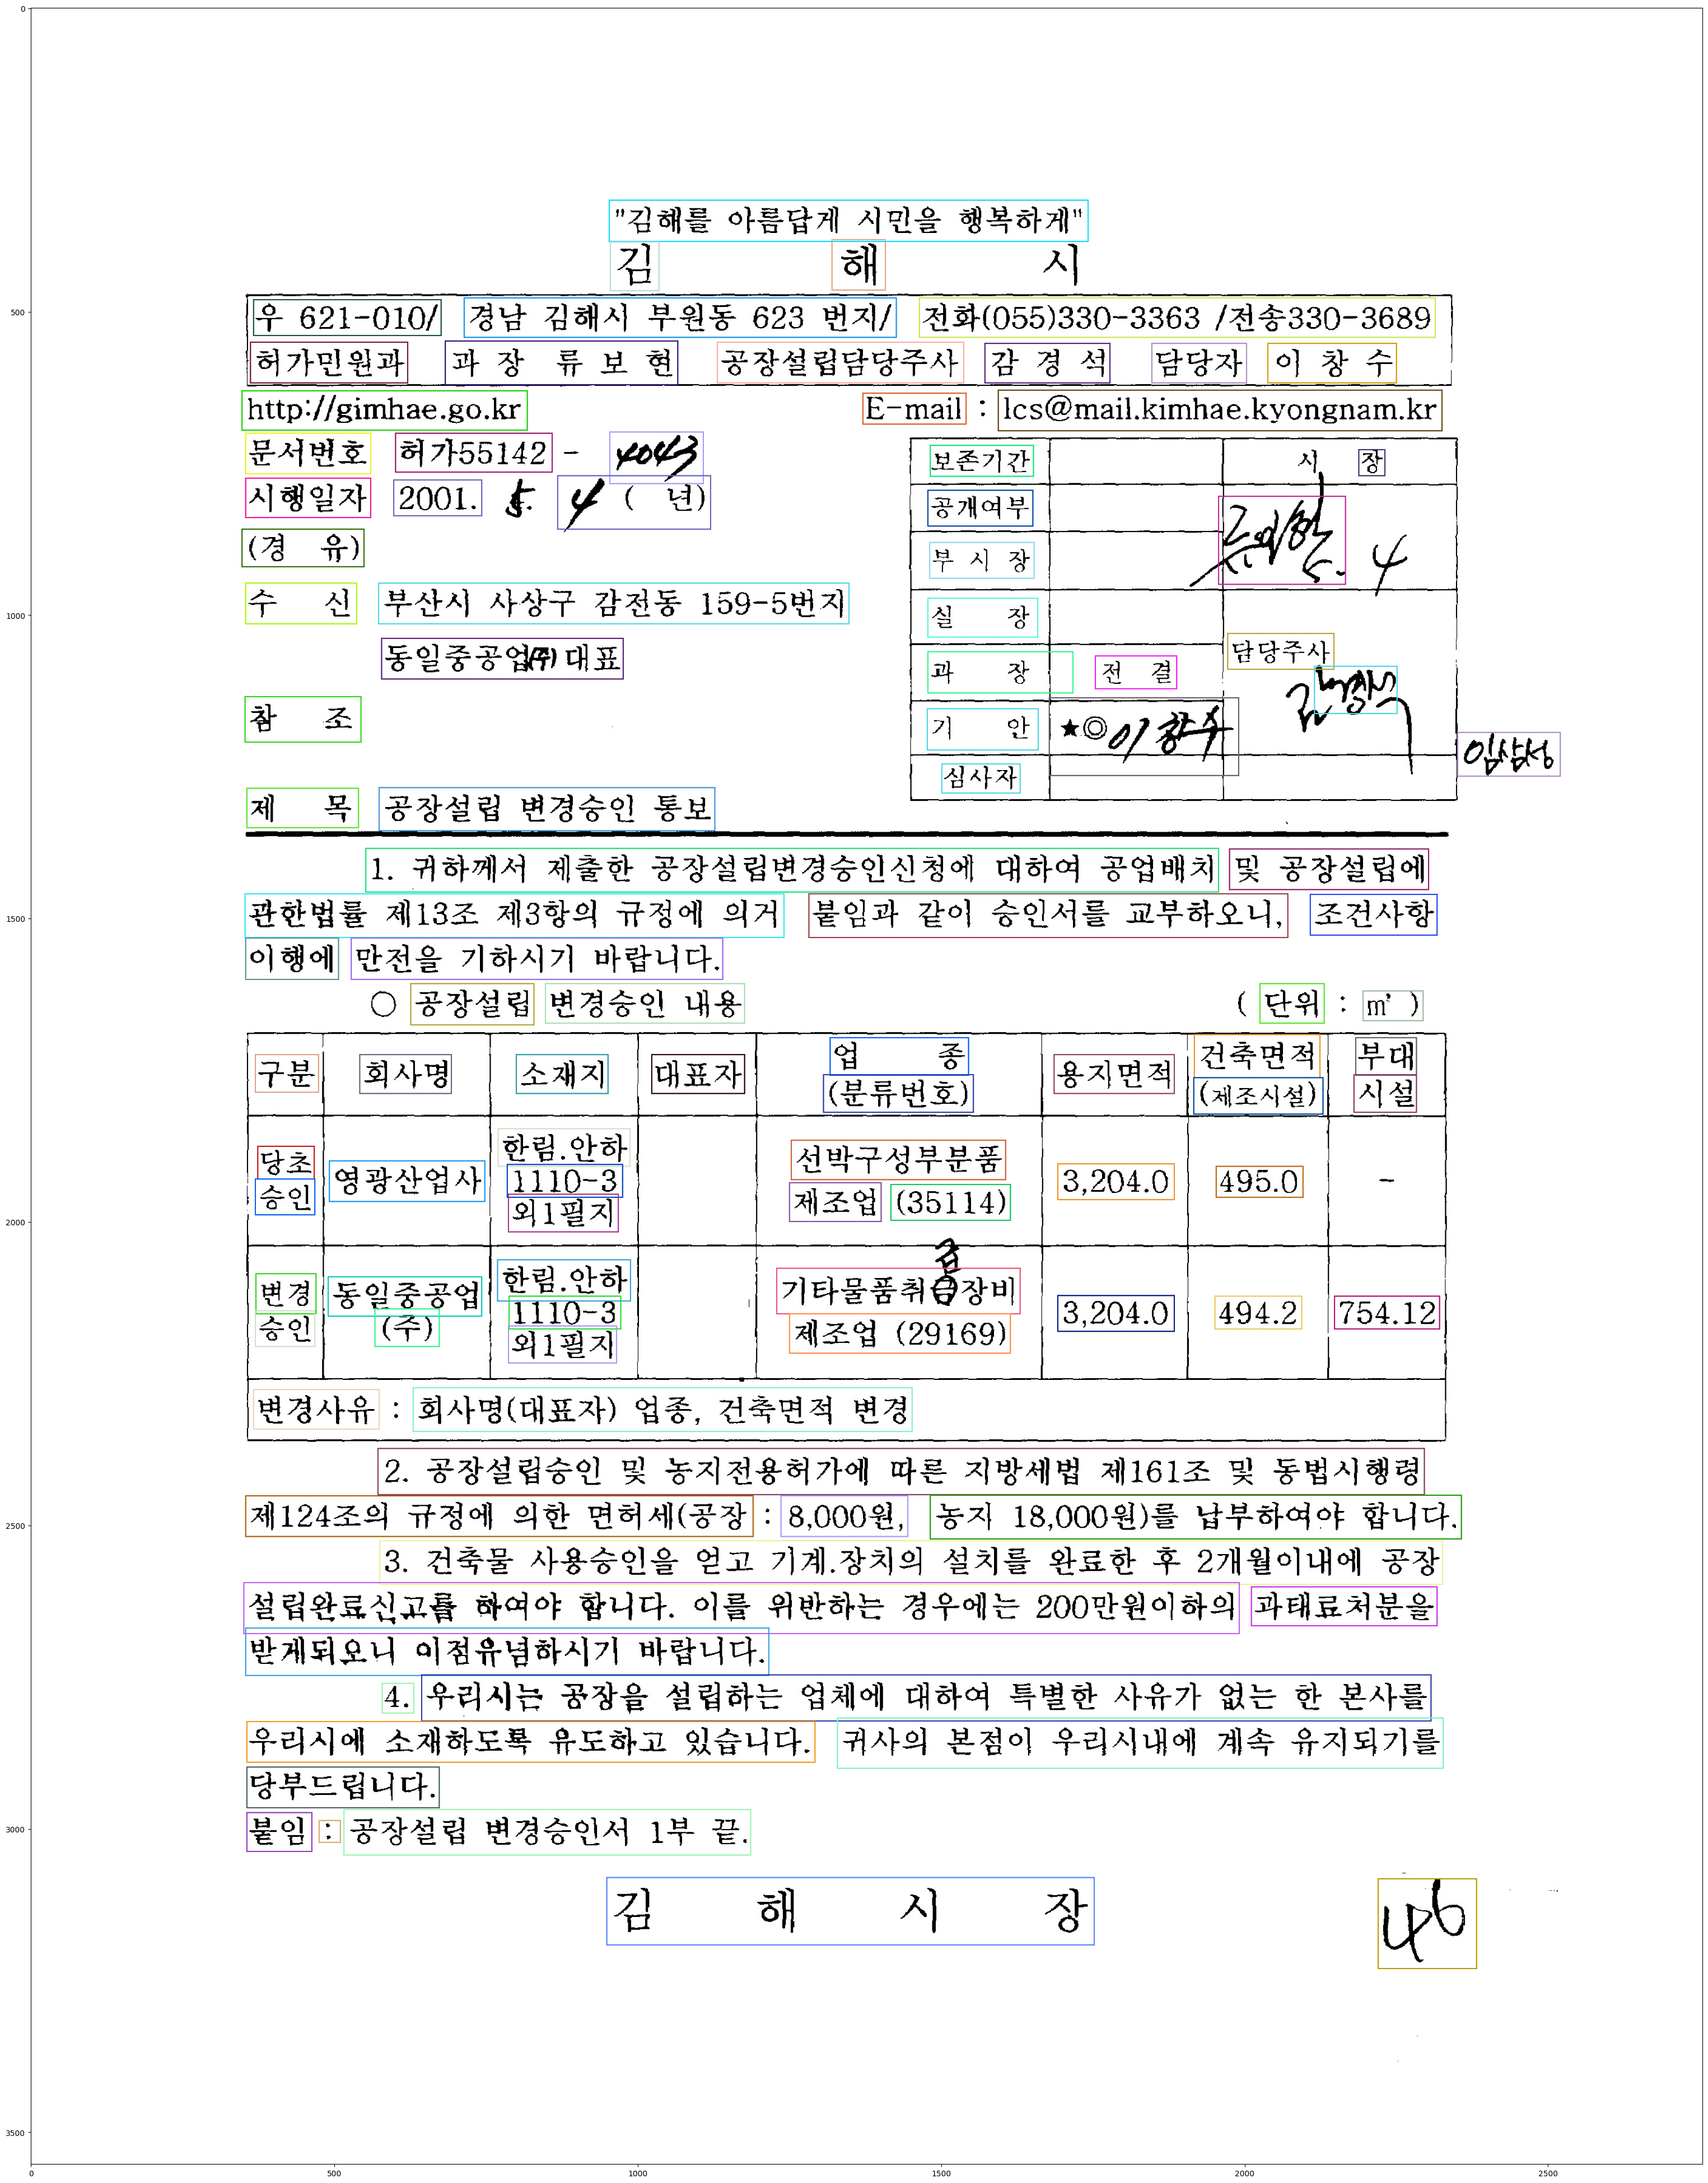


<테스트 총 결과>
총 데이터 수 : 1개
총 소요 시간 : 0분 2초
평균 인식 시간 : 2.50초


In [74]:
import easyocr
import json
import os
import time

import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

# 폴더 경로
folder_path_source = '2001_source'
folder_path_label = '2001_label'

# 폴더 안에 있는 모든 파일을 리스트 형태로 가져오기
file_list = os.listdir(folder_path_source)

# 파일 경로와 파일 이름 결합
file_paths = [os.path.join(folder_path_source, file_name) for file_name in file_list]

# 파일 수와 평균 경과 시간, 평균 정확도를 저장할 변수 초기화
file_count = len(file_paths)
total_elapsed_time = 0
total_accuracy = 0


# 파일 개수 지정 (ex) 1개)
file_paths = file_paths[:1]
file_count = 1


# easyocr 모델 로드
reader = easyocr.Reader(['ko','en'], gpu=True)

# 각 파일에 대해 OCR 수행
for file_path in file_paths:
    filename_split = os.path.splitext(os.path.basename(file_path))[0]
    print("파일명 :", os.path.basename(file_path))
    print("인식 실행 중")
    
    # 시작 시간 저장
    start_time = time.time()
    
    # OCR 인식 결과 추출
    result = reader.readtext(folder_path_source+"/"+filename_split+".jpg")
    
    # 인식 경과 시간 계산
    elapsed_time = time.time() - start_time
    
    # 총 경과 시간 계산
    total_elapsed_time += elapsed_time
    
    # 문자 인식 결과 출력
    print("")
    print("<EasyOCR 인식 결과>")
    print(result)
    
    print("")
    print("<EasyOCR 좌표 값 인덱싱>")
    # 좌표 값만 출력 (인덱싱)
    for i in result:
        print(i[0])
    
    # 라벨링 데이터(json) 파일 불러오기
    with open(folder_path_label+"/"+filename_split+".json", encoding="UTF8") as file:
        data = json.load(file)
        json_test = data['annotations']
        
        # 라벨링 데이터의 좌표 값만 출력
        print("")
        print("<라벨링 데이터>")
        for k in json_test:
            print(k['annotation.bbox'])
            
    # 경과 시간 출력
    print("")
    print("경과 시간 : {:.2f}초".format(elapsed_time))
    print("")
            
    # 인식 결과 출력
    img = cv2.imread(folder_path_source+"/"+filename_split+".jpg")

    img = Image.fromarray(img)    # 이미지에 그리기 위해서 CV2 이미지를 PIL 이미지 객체로 변환
    draw = ImageDraw.Draw(img)

    np.random.seed(42)
    COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")

    for i in result :
        # 이미지 좌표 변수 지정
        x = i[0][0][0] 
        y = i[0][0][1] 
        w = i[0][1][0] - i[0][0][0] 
        h = i[0][2][1] - i[0][1][1]
    
        # 랜덤 색상 지정
        color_idx = random.randint(0,254)
        color = [int(c) for c in COLORS[color_idx]]

        # 이미지에 인식 영역 / 인식 문자 출력
        draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)

    plt.figure(figsize=(50,50))
    plt.imshow(img)
    plt.show()
    img.save('ResultImage_readtext_non/'+filename_split+'_result(readtext_non).jpg')  # JPG 형식으로 저장
    print("")

# 총 데이터 수 및 총 소요시간, 평균 경과 시간, 평균 정확도 계산
average_elapsed_time = total_elapsed_time / file_count
average_accuracy = total_accuracy / file_count
total_minutes = int(total_elapsed_time // 60)
total_seconds = int(total_elapsed_time % 60)

# 테스트 결과 출력
print("<테스트 총 결과>")
print("총 데이터 수 : "+str(file_count)+"개")
print("총 소요 시간 : "+str(total_minutes)+"분 "+str(total_seconds)+"초")
print("평균 인식 시간 : {:.2f}초".format(average_elapsed_time))

low_text = 0.3 추가

파일명 : 5350109-2001-0001-0001.jpg
인식 실행 중

<EasyOCR 인식 결과>
[([[952, 316], [1129, 316], [1129, 385], [952, 385]], '"김해률', 0.8206546902656555), ([[1134, 313], [1346, 313], [1346, 391], [1134, 391]], '아름답게', 0.9612950682640076), ([[1348, 313], [1513, 313], [1513, 391], [1348, 391]], '시민올', 0.3593933145373481), ([[1515, 313], [1746, 313], [1746, 391], [1515, 391]], '행복하게"', 0.9884976149753107), ([[946, 375], [1043, 375], [1043, 471], [946, 471]], '김', 0.9995153537634138), ([[1307, 375], [1412, 375], [1412, 471], [1307, 471]], '해', 0.9999568467027444), ([[361, 475], [424, 475], [424, 543], [361, 543]], '우', 0.9999680521655705), ([[430, 477], [679, 477], [679, 543], [430, 543]], '621-010/', 0.8111244835149738), ([[710, 474], [999, 474], [999, 550], [710, 550]], '경남  김해시', 0.5357156154636527), ([[1007, 474], [1177, 474], [1177, 550], [1007, 550]], '부원동', 0.9964404371681157), ([[1177, 477], [1284, 477], [1284, 540], [1177, 540]], '623', 0.9999304413795471), ([[1293, 474], [1432, 474], [1432, 55

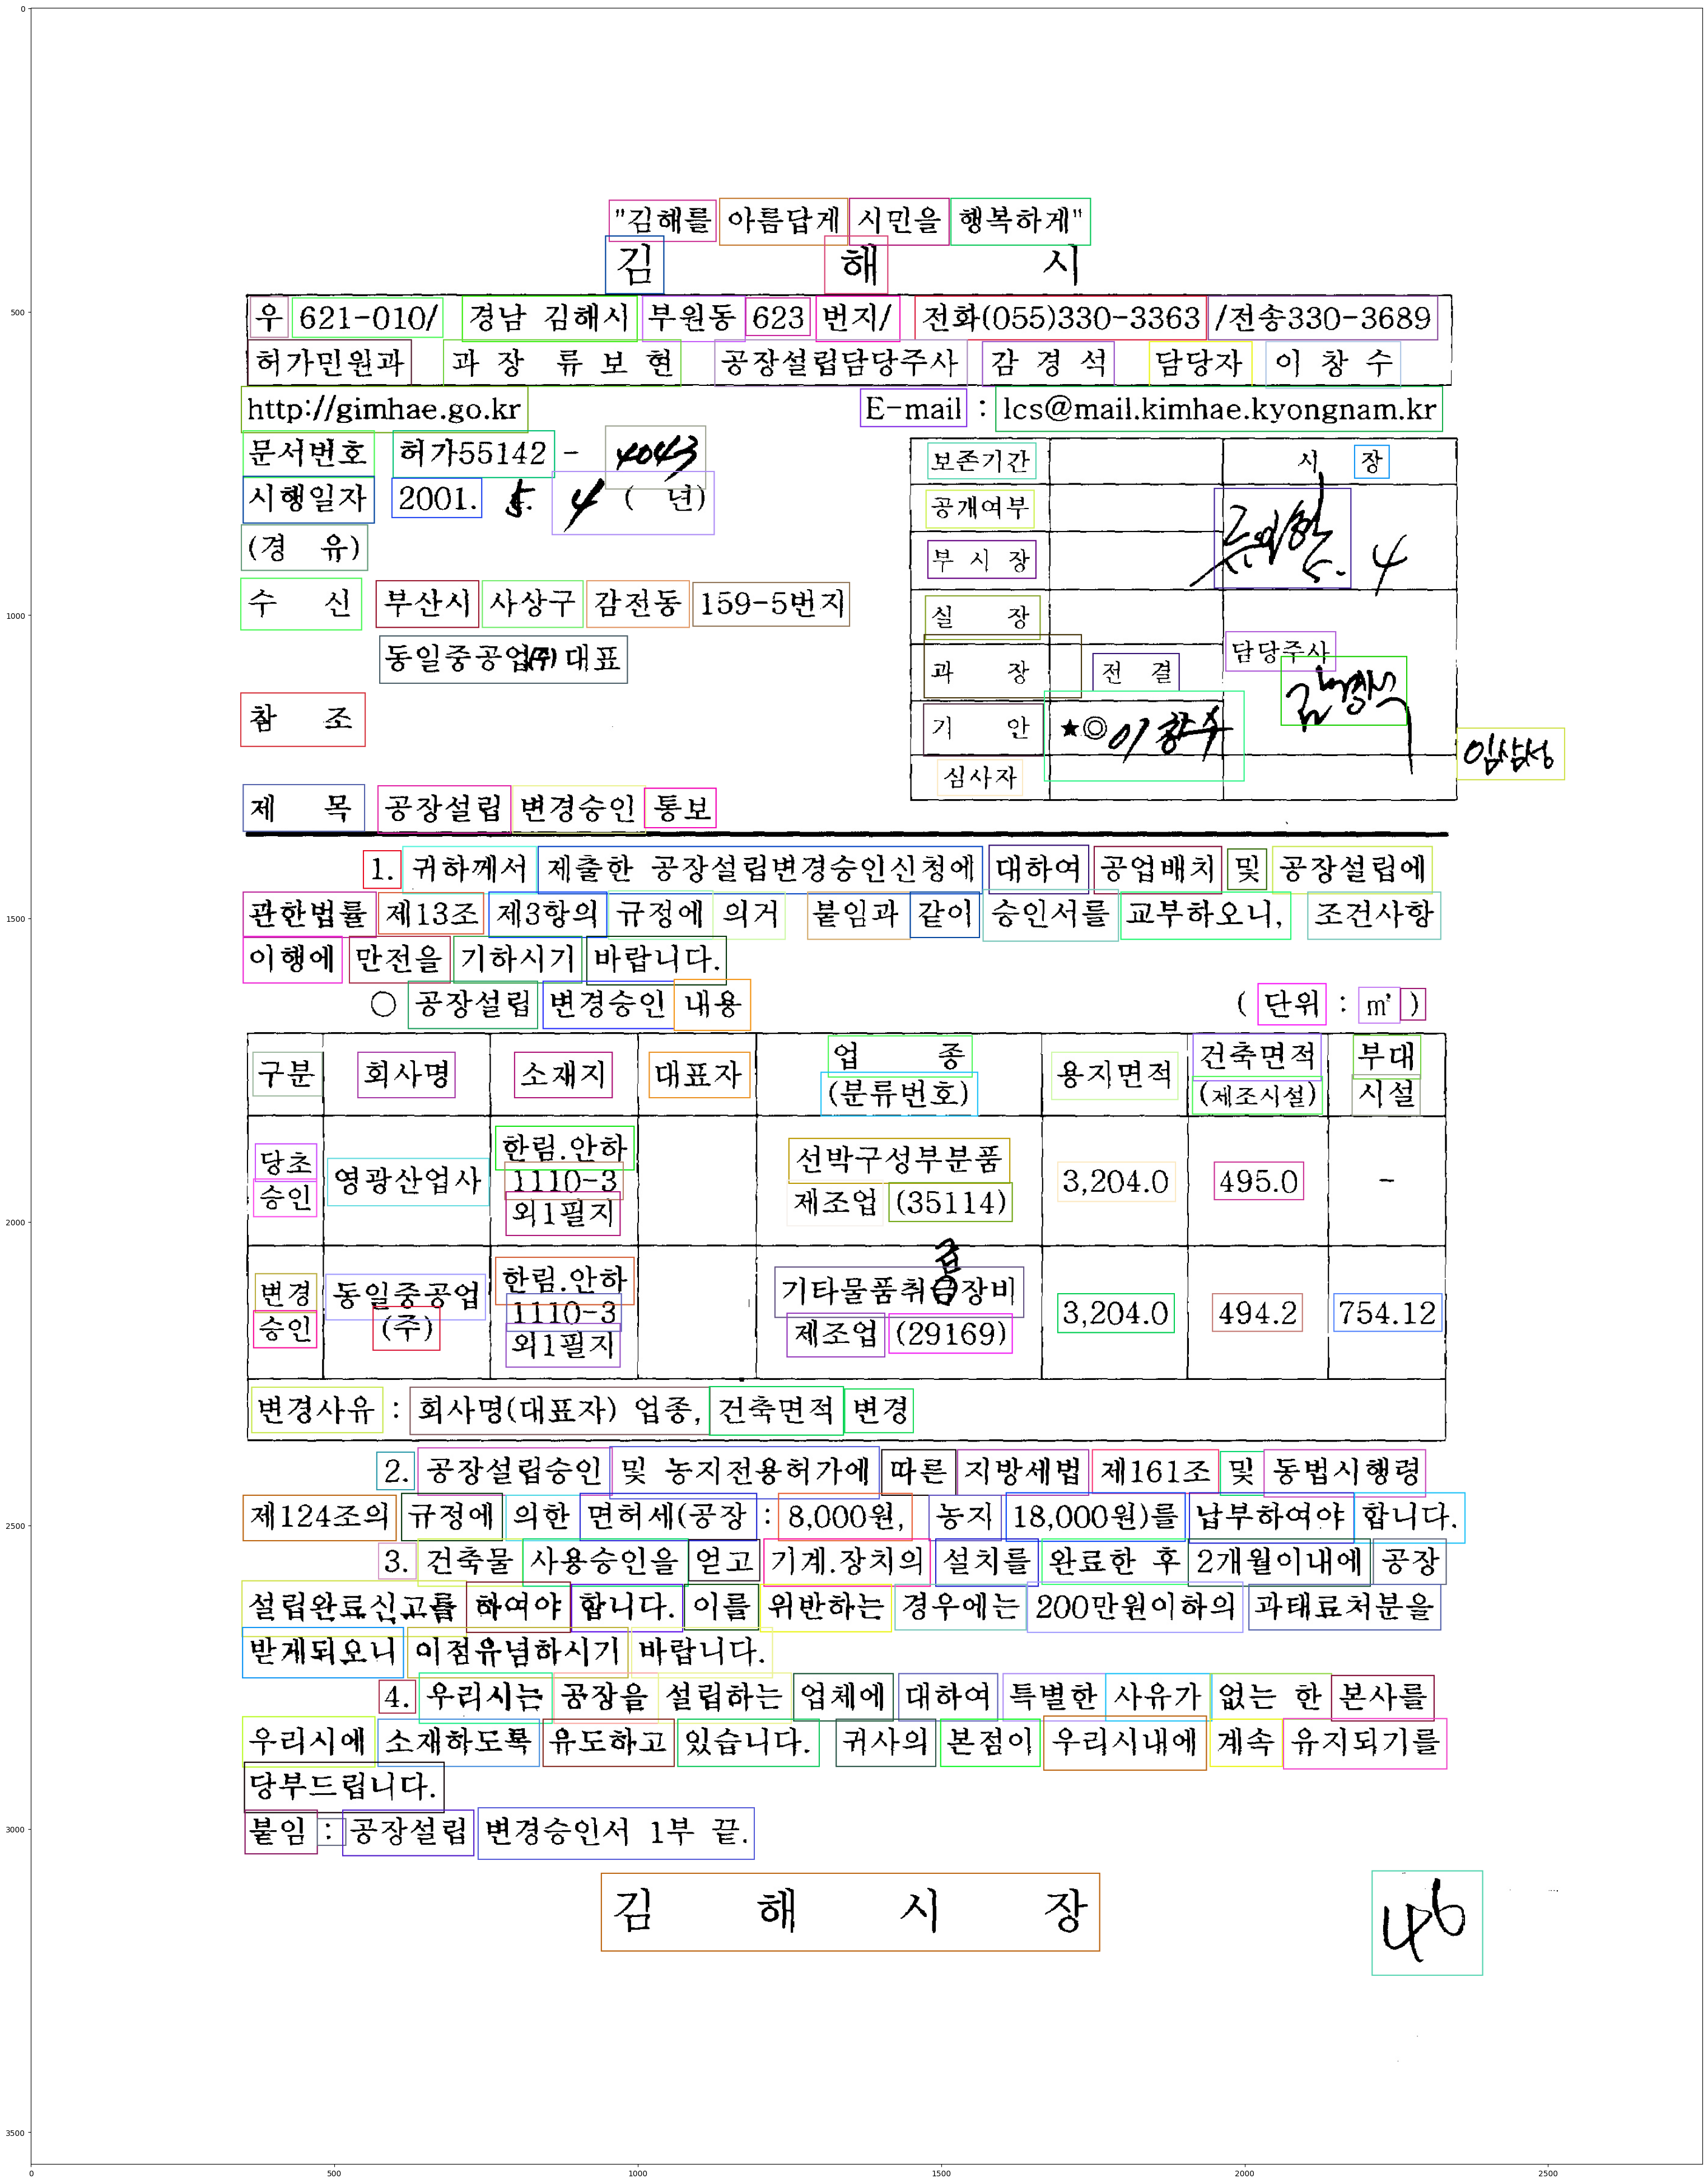


<테스트 총 결과>
총 데이터 수 : 1개
총 소요 시간 : 0분 2초
평균 인식 시간 : 2.69초


In [75]:
import easyocr
import json
import os
import time

import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

# 폴더 경로
folder_path_source = '2001_source'
folder_path_label = '2001_label'

# 폴더 안에 있는 모든 파일을 리스트 형태로 가져오기
file_list = os.listdir(folder_path_source)

# 파일 경로와 파일 이름 결합
file_paths = [os.path.join(folder_path_source, file_name) for file_name in file_list]

# 파일 수와 평균 경과 시간, 평균 정확도를 저장할 변수 초기화
file_count = len(file_paths)
total_elapsed_time = 0
total_accuracy = 0


# 파일 개수 지정 (ex) 1개)
file_paths = file_paths[:1]
file_count = 1


# easyocr 모델 로드
reader = easyocr.Reader(['ko','en'], gpu=True)

# 각 파일에 대해 OCR 수행
for file_path in file_paths:
    filename_split = os.path.splitext(os.path.basename(file_path))[0]
    print("파일명 :", os.path.basename(file_path))
    print("인식 실행 중")
    
    # 시작 시간 저장
    start_time = time.time()
    
    # OCR 인식 결과 추출
    result = reader.readtext(folder_path_source+"/"+filename_split+".jpg", width_ths=0.1, adjust_contrast=0.1, low_text=0.3)
    
    # 인식 경과 시간 계산
    elapsed_time = time.time() - start_time
    
    # 총 경과 시간 계산
    total_elapsed_time += elapsed_time
    
    # 문자 인식 결과 출력
    print("")
    print("<EasyOCR 인식 결과>")
    print(result)
    
    print("")
    print("<EasyOCR 좌표 값 인덱싱>")
    # 좌표 값만 출력 (인덱싱)
    for i in result:
        print(i[0])
    
    # 라벨링 데이터(json) 파일 불러오기
    with open(folder_path_label+"/"+filename_split+".json", encoding="UTF8") as file:
        data = json.load(file)
        json_test = data['annotations']
        
        # 라벨링 데이터의 좌표 값만 출력
        print("")
        print("<라벨링 데이터>")
        for k in json_test:
            print(k['annotation.bbox'])
            
    # 경과 시간 출력
    print("")
    print("경과 시간 : {:.2f}초".format(elapsed_time))
    print("")
            
    # 인식 결과 출력
    img = cv2.imread(folder_path_source+"/"+filename_split+".jpg")

    img = Image.fromarray(img)    # 이미지에 그리기 위해서 CV2 이미지를 PIL 이미지 객체로 변환
    draw = ImageDraw.Draw(img)

    np.random.seed(42)
    COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")

    for i in result :
        # 이미지 좌표 변수 지정
        x = i[0][0][0] 
        y = i[0][0][1] 
        w = i[0][1][0] - i[0][0][0] 
        h = i[0][2][1] - i[0][1][1]
    
        # 랜덤 색상 지정
        color_idx = random.randint(0,254)
        color = [int(c) for c in COLORS[color_idx]]

        # 이미지에 인식 영역 / 인식 문자 출력
        draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)

    plt.figure(figsize=(50,50))
    plt.imshow(img)
    plt.show()
    img.save('ResultImage_readtext_low/'+filename_split+'_result(readtext_low).jpg')  # JPG 형식으로 저장
    print("")

# 총 데이터 수 및 총 소요시간, 평균 경과 시간, 평균 정확도 계산
average_elapsed_time = total_elapsed_time / file_count
average_accuracy = total_accuracy / file_count
total_minutes = int(total_elapsed_time // 60)
total_seconds = int(total_elapsed_time % 60)

# 테스트 결과 출력
print("<테스트 총 결과>")
print("총 데이터 수 : "+str(file_count)+"개")
print("총 소요 시간 : "+str(total_minutes)+"분 "+str(total_seconds)+"초")
print("평균 인식 시간 : {:.2f}초".format(average_elapsed_time))

### 결과 분석

1. 속도 : detect(1.85초) -> readtext(파라미터 x)(2.50초) -> readtext(low 추가) -> readtext(0.1)(2.83초) 순 / 최초 1회 실행 기준 약 1초 차이
2. 인식 영역 결과 : detect = readtext(파라미터 x) 가 서로 같고 / readtext(0.1/low 추가)가 좀 더 분할이 많다.
3. 손글씨 인식 : 동일
4. gpu 환경이 확실히 빠르다.

결론 - detect 함수를 사용하면 아주 약간은 빠르다.(but 파라미터 사용 불가) / bounding box 인식은 모두 준수한 편, 분리 정도에 따라 파라미터 값 조정

### 의문점

1. 좌표값
   EasyOCR 결과 : [startX, startY, endX, endY] 라고 하는데 [startX, endX, startY, endY] 라고 보는게 더 맞는거 같기도..
   라벨링 데이터 : 무슨 순서인지 잘 모르겠다..
2. bounding box 인식률
   따라서 인식 정도를 어떻게 계산할지.. 라벨링 데이터와 어떻게 비교할지..
   좌표값의 오차 범위와 비교 방법 등등..
   솔직히 의미가 있을까